In [1]:
import gym_sin
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Product, ConstantKernel as C

from active_learning.gp_ts import GaussianProcessThompsonSampling

In [2]:
def get_const_task_sequence(alpha, n_restarts, num_test_processes):
    kernel = C(1.0, (1e-5, 1e5)) * RBF(1, (1e-5, 1e5))

    gp_list = []
    for i in range(2):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 alpha=alpha ** 2,
                                                 normalize_y=True,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])
    test_kwargs = []
    env_list = []
    init_prior_test = [torch.tensor([[-10], [5]], dtype=torch.float32) for _ in range(num_test_processes)]
        
    mean = -5
    std = 15
    
    for idx in range(50):
        test_kwargs.append({'amplitude': 1,
                            'mean': mean,
                            'std': std,
                            'noise_std': 0.1,
                            'scale_reward': False})
        env_list.append(gym.make('gauss-v0', **test_kwargs[idx]))
        
    return gp_list, test_kwargs, init_prior_test, env_list

def get_linear_task_sequence(alpha, n_restarts, num_test_processes):
    kernel = C(1.0, (1e-5, 1e5)) * RBF(1, (1e-5, 1e5))

    gp_list = []
    for i in range(2):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 alpha=alpha ** 2,
                                                 normalize_y=True,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])
    test_kwargs = []
    env_list = []
    init_prior_test = [torch.tensor([[30], [5]], dtype=torch.float32) for _ in range(num_test_processes)]

    for idx in range(50):
        std = 15
        mean = 30 - idx
        
        test_kwargs.append({'amplitude': 1,
                            'mean': mean,
                            'std': std,
                            'noise_std': 0.1,
                            'scale_reward': False})
        env_list.append(gym.make('gauss-v0', **test_kwargs[idx]))

    return gp_list, test_kwargs, init_prior_test, env_list

def get_phase_task_sequence(alpha, n_restarts, num_test_processes):
    kernel = C(1.0, (1e-5, 1e5)) * RBF(1, (1e-5, 1e5))

    gp_list = []
    for i in range(2):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 alpha=alpha ** 2,
                                                 normalize_y=True,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])
    test_kwargs = []
    env_list = []
    init_prior_test = [torch.tensor([[-5], [5]], dtype=torch.float32) for _ in range(num_test_processes)]

    for idx in range(50):
        if idx < 15:
            std = 15
            mean = 0
        elif idx < 30:
            std = 15
            mean = 10
        else:
            std = 15
            mean = 0
            
        test_kwargs.append({'amplitude': 1,
                            'mean': mean,
                            'std': std,
                            'noise_std': 0.1,
                            'scale_reward': False})
        
        env_list.append(gym.make('gauss-v0', **test_kwargs[idx]))

    return gp_list, test_kwargs, init_prior_test, env_list

def get_abrupt_and_smooth(alpha, n_restarts, num_test_processes):
    kernel = C(1.0, (1e-5, 1e5)) * RBF(1, (1e-5, 1e5))

    gp_list = []
    for i in range(2):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 alpha=alpha ** 2,
                                                 normalize_y=True,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])
    test_kwargs = []
    env_list = []
    init_prior_test = [torch.tensor([[-30], [5]], dtype=torch.float32) for _ in range(num_test_processes)]

    for idx in range(80):
        if idx < 15:
            std = 15
            mean = -30
        elif idx < 50:
            std = 15
            mean = -20 + (idx - 15)
        else:
            std = 15
            mean = -20 + 50 - 15 

            
        test_kwargs.append({'amplitude': 1,
                            'mean': mean,
                            'std': std,
                            'noise_std': 0.1,
                            'scale_reward': False})
        
        env_list.append(gym.make('gauss-v0', **test_kwargs[idx]))

    return gp_list, test_kwargs, init_prior_test, env_list


In [3]:
x_min = -1
x_max = 1

x_space = np.linspace(x_min, x_max, 5000)

agent = GaussianProcessThompsonSampling(arms=x_space, alpha=0.25, n_restart_opt=10, init_std_dev=1e2, normalized=True)

In [5]:
_, test_kwargs, _, env_list = get_const_task_sequence(10, 1, 1)
const = agent.test_sequence(env_list)
const

Task 0 in 50
Task 10 in 50
Task 20 in 50
Task 30 in 50
Task 40 in 50


[129.95110286437128,
 132.2628115928685,
 129.62355628198574,
 128.84698100774733,
 131.14342179192838,
 126.1997105302751,
 128.88205555249215,
 132.01604060993162,
 126.94510929578193,
 130.7545428901568,
 125.22047459725204,
 134.13054687045593,
 130.79236886666754,
 130.49467255061646,
 129.86891906574476,
 127.48446565691347,
 128.88323330067917,
 126.76332897243029,
 128.80231495330162,
 132.78288828557365,
 129.71443652852577,
 122.47307257318026,
 133.0281384154344,
 132.20564237015284,
 132.98991191950572,
 129.28655909531196,
 114.25432078902969,
 127.20549778693288,
 130.1219123854328,
 130.20890394346623,
 135.81485125133162,
 125.71337538902857,
 132.58850672460312,
 116.16393977744059,
 132.08178585246696,
 119.5103446036565,
 131.2441191621825,
 134.42232653856365,
 128.84116566605005,
 135.02952269158106,
 128.05019748093753,
 131.6437785975774,
 133.12427403421344,
 133.07085751165027,
 133.34419909674534,
 125.46995640930263,
 130.43335329735345,
 127.98732285556886,


In [ ]:
_, test_kwargs, _, env_list = get_linear_task_sequence(10, 1, 1)
linaer = agent.test_sequence(env_list)
linaer

In [9]:
_, test_kwargs, _, env_list = get_phase_task_sequence(10, 1, 1)
phase = agent.test_sequence(env_list)
phase

Task 0 in 50
Task 10 in 50
Task 20 in 50
Task 30 in 50
Task 40 in 50


[129.24957308542946,
 132.02975809346023,
 130.53249784944063,
 133.51252004955978,
 126.2974060424465,
 117.7981036800452,
 129.6026845789391,
 129.4744631402679,
 131.7228283780331,
 124.86973564314299,
 118.19250836267348,
 122.30894890361228,
 123.38224533426762,
 130.55244618266175,
 133.17999401197557,
 122.50937665090117,
 125.24196294247855,
 132.18383102404317,
 128.07206120321086,
 128.35233105072354,
 131.87622258156944,
 131.43164169162236,
 131.29269326806,
 127.18281429799501,
 130.71821667689053,
 127.96078459772303,
 123.04082197178678,
 131.07672632703438,
 130.04540161758672,
 130.0642616290193,
 130.85396576018377,
 132.84976072123632,
 129.9378273633811,
 125.68820115032943,
 125.5996919986443,
 131.82149141428653,
 133.5647091467275,
 127.9108911353213,
 126.09203453051823,
 128.17438470321338,
 128.0815207733947,
 131.75134612921636,
 131.85831290134175,
 129.0589178782306,
 131.91519106826823,
 131.76965633333592,
 129.10849781631532,
 131.4146564967043,
 131.936

In [10]:
_, test_kwargs, _, env_list = get_abrupt_and_smooth(10, 1, 1)
both = agent.test_sequence(env_list)
both


Task 0 in 80
Task 10 in 80
Task 20 in 80
Task 30 in 80
Task 40 in 80
Task 50 in 80
Task 60 in 80
Task 70 in 80


[126.88819455858194,
 128.6463499443965,
 126.92909882858157,
 131.25504137378837,
 125.31844926526603,
 131.12811568041082,
 135.06694869066558,
 131.00117281124443,
 130.2887586325681,
 130.41273805134512,
 127.5390043375811,
 134.96445840632077,
 130.4184123610269,
 129.70158960314697,
 133.43541865420866,
 123.74561517650571,
 133.14746837521642,
 110.87427975453275,
 133.11247855276312,
 130.50575329163962,
 130.56201132477858,
 132.46185284531282,
 134.18972931094183,
 125.8032509772748,
 130.76403949088598,
 133.76288768440554,
 130.98027602348844,
 132.91424232224693,
 116.6292972789319,
 122.437874358379,
 130.3811619038181,
 130.92239647410696,
 129.59527722760208,
 125.18269317268448,
 117.51060774113996,
 130.10918981335655,
 129.488295825798,
 125.77146722678944,
 129.78286020103366,
 132.85168714343988,
 130.88936347285716,
 132.69102659296487,
 129.22849477005576,
 130.75837216565697,
 129.26258354824432,
 127.13923899135894,
 129.78921745099967,
 124.3357385097965,
 128

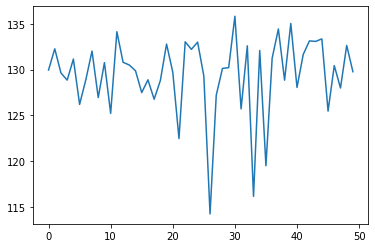

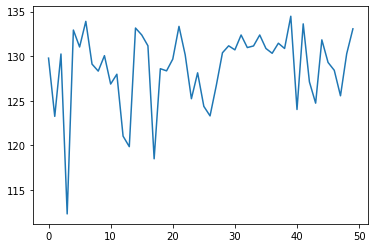

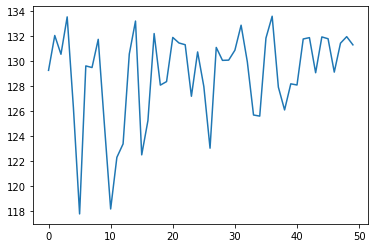

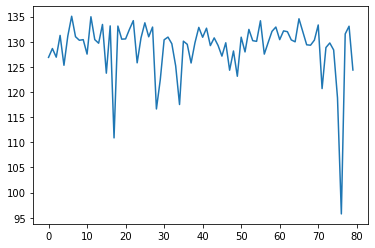

In [15]:
plt.plot(const)
plt.show()

plt.plot(linaer)
plt.show()

plt.plot(phase)
plt.show()

plt.plot(both)
plt.show()